In [6]:
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense,Dropout,  Flatten


C:\Users\user\AppData\Roaming\Python\Python313\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


## Get the data and pre-process it
 

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape , y_train.shape, y_test.shape
((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [8]:
def plot_input_img(i):
    plt.imshow(X_train[i], cmap='binary')
    plt.title(y_train[i])
    plt.axis('off')
    plt.show()

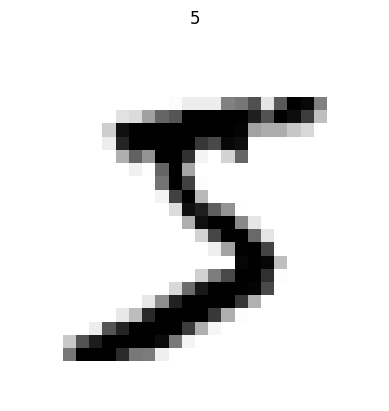

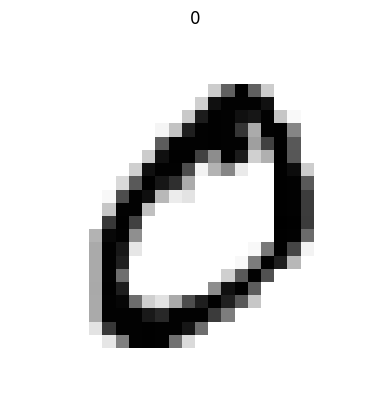

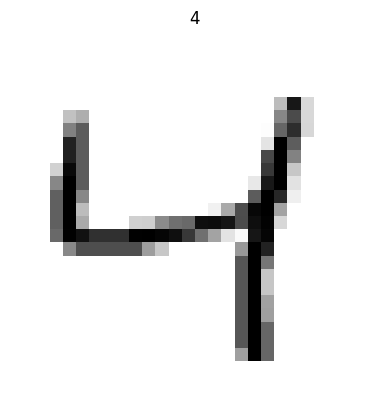

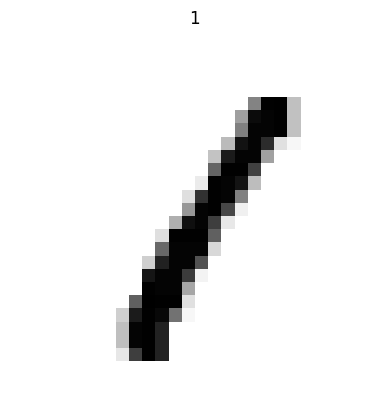

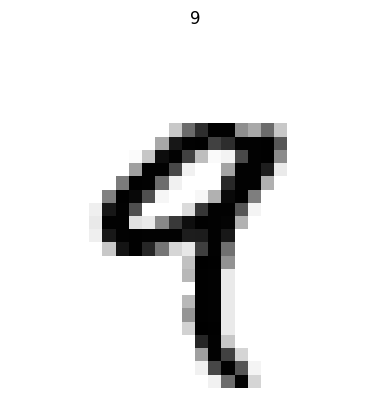

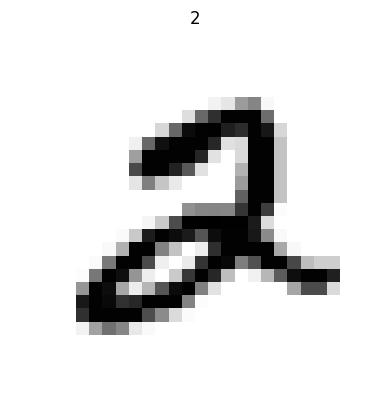

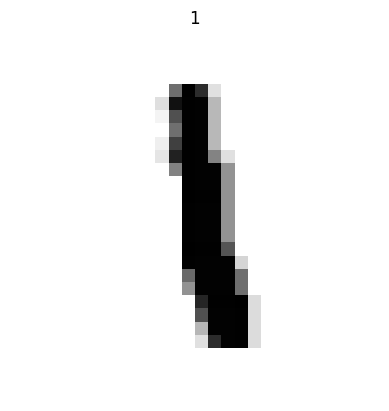

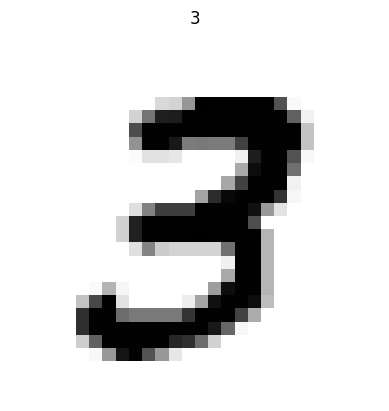

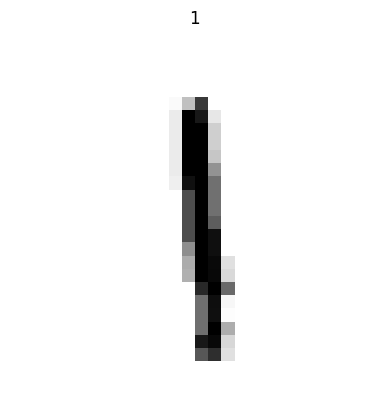

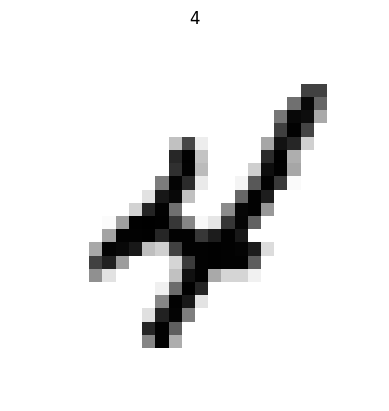

In [9]:
for i in range(10):
    plot_input_img(i)

In [10]:
# Pre process the images

#Normalize the images to [0, 1] ranges

X_train = X_train.astype(np.float32)/255
X_test= X_test.astype(np.float32)/255

#Reshape / expand the dimensions of images to (28, 28, 1) 
X_train = np.expand_dims(X_train, -1)  
X_test = np.expand_dims(X_test, -1)

# convert classes to one hot vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [11]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

# early stopping

es = EarlyStopping(monitor='val_loss', min_delta=0.01, verbose= 1, patience= 4)

# model checkpoint
mc  = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True)
cb = [es, mc]

Model Training

In [19]:
his = model.fit(X_train, y_train, validation_split=0.3, epochs=50 ,)

Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.9928 - loss: 0.0214 - val_accuracy: 0.9884 - val_loss: 0.0414
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - accuracy: 0.9942 - loss: 0.0182 - val_accuracy: 0.9886 - val_loss: 0.0412
Epoch 3/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.9937 - loss: 0.0176 - val_accuracy: 0.9880 - val_loss: 0.0441
Epoch 4/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.9947 - loss: 0.0153 - val_accuracy: 0.9886 - val_loss: 0.0476
Epoch 5/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.9949 - loss: 0.0145 - val_accuracy: 0.9901 - val_loss: 0.0404
Epoch 6/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.9948 - loss: 0.0150 - val_accuracy: 0.9879 - val_loss: 0.0474
Epoch 7/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - accuracy: 0.9951 - loss: 0.0138 - val_accuracy: 0.9898 - val_loss: 0.0432
Epoch 8/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.9956 -

In [16]:
model_S = keras.models.load_model('C://Users//user//OneDrive//Desktop//ML project//best_model.h5')

In [17]:
score = model_S.evaluate(X_test, y_test)

print(f" the model accuracy is {score[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9903 - loss: 0.0304
 the model accuracy is 0.9902999997138977
